# Introduction
***
**Pandas Mini Project - Bali Tourist Data Analyzer**  <br>

# Import Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [2]:
bali_tourist_df = pd.read_csv('dataset/bali_tourist.csv')
bali_tourist_df

,year,area,country,January,February,March,April,May,June,July,August,September,October,November,December
0,2019,ASIA PACIFIC,AUSTRALIAN,95536,67474,83002,90265.0,98625,110815,123293,118556,124416,119382,105312,110711
1,2019,ASIA PACIFIC,BHUTAN,60,30,47,38.0,31,31,46,67,43,32,56,60
2,2019,ASIA PACIFIC,BANGLADESH,2262,2094,2489,2264.0,1938,4265,2656,2307,2035,2371,2164,2671
3,2019,ASIA PACIFIC,FIJI,91,73,72,77.0,42,62,2656,80,68,78,89,189
4,2019,ASIA PACIFIC,HONGKONG,1313,1367,764,6.0,1,5,2,1,0,11,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2018,MIDDLE EAST,TURKEY,899,615,750,960.0,712,909,1306,1630,979,707,514,521
358,2018,MIDDLE EAST,UNITED ARAB EMIRATES,170,132,266,264.0,111,293,375,306,164,151,147,201
359,2018,MIDDLE EAST,YAMAN,98,49,76,55.0,23,62,40,52,67,37,60,85
360,2018,MIDDLE EAST,JORDAN,225,153,236,352.0,150,260,389,448,283,255,218,254


In [3]:
# check tipe data setiap kolom untuk memastikan tipe data sesuai dengan spesifikasinya
bali_tourist_df.dtypes

year           int64
area          object
country       object
January        int64
February       int64
March          int64
April        float64
May            int64
June           int64
July           int64
August         int64
September      int64
October        int64
November       int64
December       int64
dtype: object

**Analisis** 
Kedatangan turis masih ada yang bertipe data float di bulan April. Akan diubah agar formatnya sesuai.

# Data Preprocessing

## Check number of missing values

In [4]:
bali_tourist_df.isnull().sum()

year         0
area         0
country      0
January      0
February     0
March        0
April        2
May          0
June         0
July         0
August       0
September    0
October      0
November     0
December     0
dtype: int64

## Missing values strategies

In [5]:
bali_tourist_df.dropna(inplace=True)
bali_tourist_df.isnull().sum()

year         0
area         0
country      0
January      0
February     0
March        0
April        0
May          0
June         0
July         0
August       0
September    0
October      0
November     0
December     0
dtype: int64

## Convert data types

In [6]:
object_columns = ['area', 'country']
int_columns = list(bali_tourist_df.drop(columns=object_columns, axis=1).columns)
bali_tourist_df[int_columns] = bali_tourist_df[int_columns].astype('int64')

In [7]:
bali_tourist_df.dtypes

year          int64
area         object
country      object
January       int64
February      int64
March         int64
April         int64
May           int64
June          int64
July          int64
August        int64
September     int64
October       int64
November      int64
December      int64
dtype: object

# Data Exploration and Understanding
***

## Check how many unique years contain in the dataset

In [11]:
bali_tourist_df['year'].value_counts()

2019    182
2018    178
Name: year, dtype: int64

## Check how many unique countries came to Bali?

In [19]:
bali_tourist_df['country'].value_counts()

AUSTRALIAN                2
BELARUS                   2
BOSNIA AND HERZEGOVINA    2
CROATIA                   2
CZECH REPUBLIC            2
                         ..
NAURU                     1
MAURITIUS                 1
REPUBLIC OF KOSOVO        1
MONTENEGRO                1
CHEKO                     1
Name: country, Length: 184, dtype: int64

# Tasks

In [10]:
bali_tourist_df.head()

,year,area,country,January,February,March,April,May,June,July,August,September,October,November,December
0,2019,ASIA PACIFIC,AUSTRALIAN,95536,67474,83002,90265,98625,110815,123293,118556,124416,119382,105312,110711
1,2019,ASIA PACIFIC,BHUTAN,60,30,47,38,31,31,46,67,43,32,56,60
2,2019,ASIA PACIFIC,BANGLADESH,2262,2094,2489,2264,1938,4265,2656,2307,2035,2371,2164,2671
3,2019,ASIA PACIFIC,FIJI,91,73,72,77,42,62,2656,80,68,78,89,189
4,2019,ASIA PACIFIC,HONGKONG,1313,1367,764,6,1,5,2,1,0,11,0,45


## Soal Nomor 1
***
Berapa total turis yang datang ke Bali pada tahun 2018 dan 2019?

In [12]:
# berhubung dataset hanya mengandung data dari tahun 2018 dan 2019, kita tidak perlu memfilter data pada kolom tahun
# drop kolom yang tidak menunjang perhitungan untuk soal ini, yaitu year, area, country
# gunakan hanya kolom bulan dari January sampai December untuk menghitung total turis yang datang ke bali
bali_tourist_df_1 = bali_tourist_df.copy()
bali_tourist_df_1.drop(columns=['year','area','country'],axis=1, inplace=True)

In [14]:
bali_tourist_df_1.head()

,January,February,March,April,May,June,July,August,September,October,November,December
0,95536,67474,83002,90265,98625,110815,123293,118556,124416,119382,105312,110711
1,60,30,47,38,31,31,46,67,43,32,56,60
2,2262,2094,2489,2264,1938,4265,2656,2307,2035,2371,2164,2671
3,91,73,72,77,42,62,2656,80,68,78,89,189
4,1313,1367,764,6,1,5,2,1,0,11,0,45


In [23]:
print('Total turis yang datang ke Bali rentang tahun 2018 - 2019 = ', bali_tourist_df_1.sum(axis=0).sum())

Total turis yang datang ke Bali rentang tahun 2018 - 2019 =  12348331


## Soal Nomor 2
***
Berapa rata-rata turis yang datang ke Bali pada tahun 2018 - 2019

In [34]:
bali_tourist_df_2 = bali_tourist_df_1.copy()
bali_tourist_df_2

,January,February,March,April,May,June,July,August,September,October,November,December
0,95536,67474,83002,90265,98625,110815,123293,118556,124416,119382,105312,110711
1,60,30,47,38,31,31,46,67,43,32,56,60
2,2262,2094,2489,2264,1938,4265,2656,2307,2035,2371,2164,2671
3,91,73,72,77,42,62,2656,80,68,78,89,189
4,1313,1367,764,6,1,5,2,1,0,11,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...
357,899,615,750,960,712,909,1306,1630,979,707,514,521
358,170,132,266,264,111,293,375,306,164,151,147,201
359,98,49,76,55,23,62,40,52,67,37,60,85
360,225,153,236,352,150,260,389,448,283,255,218,254


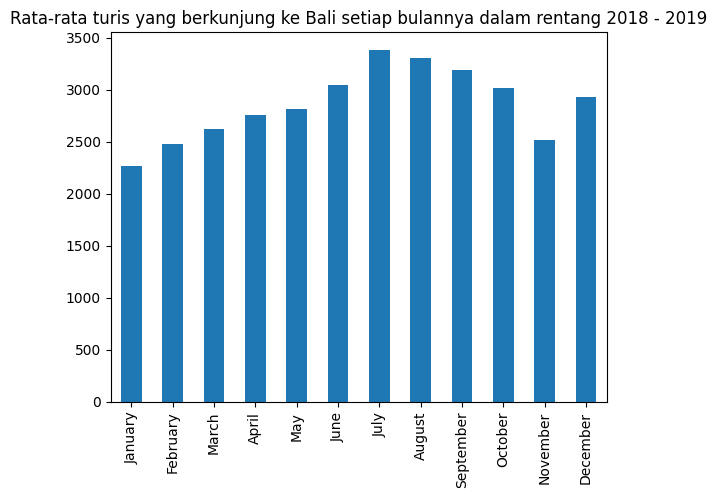

In [41]:
bali_tourist_df_2.transpose().mean(axis=1).plot(kind='bar')
plt.title('Rata-rata turis yang berkunjung ke Bali setiap bulannya dalam rentang 2018 - 2019')
plt.show()

## Soal Nomor 3 & Nomor 4
***
- Pada bulan apakah yang total turisnya paling banyak diantara bulan lainnya?
- Pada bulan apakah yang total turisnya paling sedikit diantara bulan lainnya?

In [42]:
# cari tahu maksimum kedatangan turis
bali_tourist_df_3 = bali_tourist_df_2.copy()
bali_tourist_df_3

,January,February,March,April,May,June,July,August,September,October,November,December
0,95536,67474,83002,90265,98625,110815,123293,118556,124416,119382,105312,110711
1,60,30,47,38,31,31,46,67,43,32,56,60
2,2262,2094,2489,2264,1938,4265,2656,2307,2035,2371,2164,2671
3,91,73,72,77,42,62,2656,80,68,78,89,189
4,1313,1367,764,6,1,5,2,1,0,11,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...
357,899,615,750,960,712,909,1306,1630,979,707,514,521
358,170,132,266,264,111,293,375,306,164,151,147,201
359,98,49,76,55,23,62,40,52,67,37,60,85
360,225,153,236,352,150,260,389,448,283,255,218,254


In [52]:
# jumlah semua total turis di setiap bulannya
bali_tourist_df_3.sum().sort_values(ascending=False)

July         1218645
August       1190466
September    1146468
June         1094301
October      1085942
December     1053608
May          1014102
April         993104
March         942315
November      905137
February      889960
January       814283
dtype: int64

**Analisis** <br>
1. Paling banyak total turis dibanding lainnya ada di Bulan July
2. Paling sedikit total turisnya dibanding lainnya ada di Bulan January

## Soal Nomor 5
***
Area manakah yang memiliki jumlah turis datang ke Bali terbanyak pada tahun 2018 - 2019

In [55]:
# group by area lalu dihitung jumlah kedatangan turis masing-masing area
bali_tourist_df_5 = bali_tourist_df.drop(['year'],axis=1).copy()
bali_tourist_df_5

,area,country,January,February,March,April,May,June,July,August,September,October,November,December
0,ASIA PACIFIC,AUSTRALIAN,95536,67474,83002,90265,98625,110815,123293,118556,124416,119382,105312,110711
1,ASIA PACIFIC,BHUTAN,60,30,47,38,31,31,46,67,43,32,56,60
2,ASIA PACIFIC,BANGLADESH,2262,2094,2489,2264,1938,4265,2656,2307,2035,2371,2164,2671
3,ASIA PACIFIC,FIJI,91,73,72,77,42,62,2656,80,68,78,89,189
4,ASIA PACIFIC,HONGKONG,1313,1367,764,6,1,5,2,1,0,11,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MIDDLE EAST,TURKEY,899,615,750,960,712,909,1306,1630,979,707,514,521
358,MIDDLE EAST,UNITED ARAB EMIRATES,170,132,266,264,111,293,375,306,164,151,147,201
359,MIDDLE EAST,YAMAN,98,49,76,55,23,62,40,52,67,37,60,85
360,MIDDLE EAST,JORDAN,225,153,236,352,150,260,389,448,283,255,218,254


In [69]:
bali_tourist_df_5.groupby(by='area').sum().sum(axis=1).sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2712\420853393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bali_tourist_df_5.groupby(by='area').sum().sum(axis=1).sort_values(ascending=False)


area
ASIA PACIFIC           7267493
EUROPE                 2878082
ASEAN                  1093951
AMERICA                 782901
MIDDLE EAST             136236
AFRICA                  120965
OTHER NATIONALITIES      68703
dtype: int64

**Analisis** <br>
1. Asia pasific menjadi area paling banyak penyumbang turis ke Bali dalam rentang 2018 - 2019